In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

#importing grid search, f1 score, 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import ADASYN

import pickle

In [3]:
df=pd.read_csv(r"C:\Users\User\Documents\Churn modelling\Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.drop(['Surname','RowNumber'], axis=1,inplace=True)

In [6]:
numerical_feature=df.drop(df[['Geography','Gender']], axis=1)

In [7]:
#checking outliers
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()],
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=numerical_feature.apply(lambda x: var_summary(x)).T
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
CustomerId,10000.0,0.0,1.569094e+11,1.569094e+07,1.569074e+07,71936.186123,5.174815e+09,15565701.00,1.556851e+07,1.557882e+07,15591167.10,15628528.25,1.569074e+07,1.575323e+07,1.579083e+07,1.580303e+07,1.581311e+07,15815690.00
CreditScore,10000.0,0.0,6.505288e+06,6.505288e+02,6.520000e+02,96.653299,9.341860e+03,350.00,4.320000e+02,4.890000e+02,521.00,584.00,6.520000e+02,7.180000e+02,7.780000e+02,8.120000e+02,8.500000e+02,850.00
Age,10000.0,0.0,3.892180e+05,3.892180e+01,3.700000e+01,10.487806,1.099941e+02,18.00,2.100000e+01,2.500000e+01,27.00,32.00,3.700000e+01,4.400000e+01,5.300000e+01,6.000000e+01,7.200000e+01,92.00
Tenure,10000.0,0.0,5.012800e+04,5.012800e+00,5.000000e+00,2.892174,8.364673e+00,0.00,0.000000e+00,1.000000e+00,1.00,3.00,5.000000e+00,7.000000e+00,9.000000e+00,9.000000e+00,1.000000e+01,10.00
Balance,10000.0,0.0,7.648589e+08,7.648589e+04,9.719854e+04,62397.405202,3.893436e+09,0.00,0.000000e+00,0.000000e+00,0.00,0.00,9.719854e+04,1.276442e+05,1.492448e+05,1.627117e+05,1.859680e+05,250898.09
NumOfProducts,10000.0,0.0,1.530200e+04,1.530200e+00,1.000000e+00,0.581654,3.383218e-01,1.00,1.000000e+00,1.000000e+00,1.00,1.00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,4.00
HasCrCard,10000.0,0.0,7.055000e+03,7.055000e-01,1.000000e+00,0.455840,2.077905e-01,0.00,0.000000e+00,0.000000e+00,0.00,0.00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,0.0,5.151000e+03,5.151000e-01,1.000000e+00,0.499797,2.497970e-01,0.00,0.000000e+00,0.000000e+00,0.00,0.00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,0.0,1.000902e+09,1.000902e+05,1.001939e+05,57510.492818,3.307457e+09,11.58,1.842825e+03,9.851819e+03,20273.58,51002.11,1.001939e+05,1.493882e+05,1.796747e+05,1.901554e+05,1.980697e+05,199992.48
Exited,10000.0,0.0,2.037000e+03,2.037000e-01,0.000000e+00,0.402769,1.622225e-01,0.00,0.000000e+00,0.000000e+00,0.00,0.00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.00


In [8]:
#Capping outliers at 1th and 99th percentile from Age, Balance and Estimated Salary
df['Age']=df['Age'].clip(21,72)
df['Balance']=df['Balance'].clip(0,185967.9854)
df['EstimatedSalary']=df['EstimatedSalary'].clip(11.58,198069.7345)

In [9]:
#creating dummies for gender
df=pd.get_dummies(df,columns=['Gender'],drop_first=True)

In [10]:
#creating codes for geographic location
df['Geography']=df['Geography'].astype('category')
df['Geography']=df['Geography'].cat.codes

In [11]:
#feature engineering
try:
    df['age_to_tenure']=df['Age']/df['Tenure']
    df['BalanceToSalaryRatio']=df.EstimatedSalary/df.Balance
    df['ScoreToBalance']=df.CreditScore/df.Balance
    df['SalaryToAge']=df.Age/df.EstimatedSalary
    df['ProductsToBalance']=df.NumOfProducts/df.Balance
except:
    df['age_to_tenure']=0
    df['BalanceToSalaryRatio']=0
    df['ScoreToBalance']=0
    df['SalaryToAge']=0
    df['ProductsToBalance']=0

df=df.replace([np.inf, -np.inf], 0)

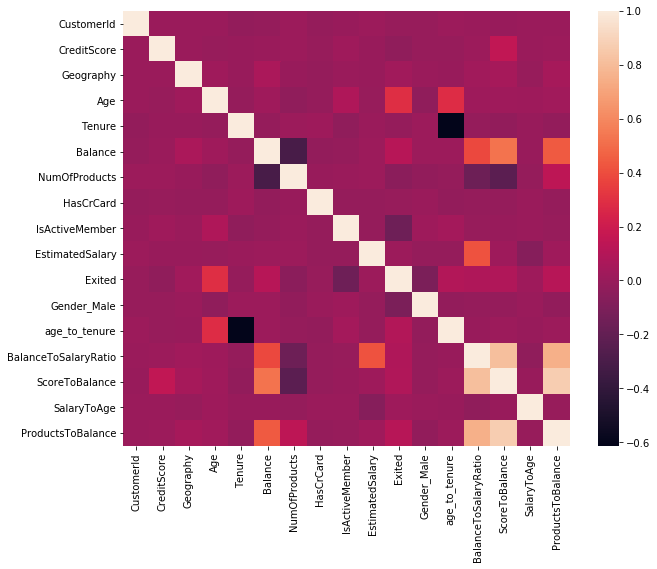

In [12]:
corr=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr)

In [13]:
#checking skewness
df.skew()

CustomerId               0.001149
CreditScore             -0.071607
Geography                0.500916
Age                      0.933032
Tenure                   0.010991
Balance                 -0.158375
NumOfProducts            0.745568
HasCrCard               -0.901812
IsActiveMember          -0.060437
EstimatedSalary          0.001077
Exited                   1.471611
Gender_Male             -0.183596
age_to_tenure            2.183452
BalanceToSalaryRatio    19.187826
ScoreToBalance          13.342064
SalaryToAge             87.320805
ProductsToBalance       16.337533
dtype: float64

In [14]:
df.columns

Index(['CustomerId', 'CreditScore', 'Geography', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Gender_Male', 'age_to_tenure', 'BalanceToSalaryRatio',
       'ScoreToBalance', 'SalaryToAge', 'ProductsToBalance'],
      dtype='object')

In [15]:
#importing train test 
from sklearn.model_selection import train_test_split
y=df[['Exited']]
x=df.drop(['Exited','CustomerId'],axis=1)

#Applying upsampling using ADASYN

x_resampled, y_resampled = ADASYN().fit_sample(x, y)

x_train, x_test, y_train, y_test=train_test_split(x_resampled,y_resampled,test_size=0.2,random_state=123)

print('x_train: ',x_train.shape)
print('y_train: ',y_train.shape)
print('x_test: ',x_test.shape)
print('y_test: ',y_test.shape)

x_train:  (12752, 15)
y_train:  (12752, 1)
x_test:  (3189, 15)
y_test:  (3189, 1)


In [16]:
from sklearn.preprocessing import StandardScaler
Stdscaler=StandardScaler()
x_train_s=Stdscaler.fit_transform(x_train)
x_test_s=Stdscaler.transform(x_test)

In [17]:
# parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
penalty=['l1','l2']
C=np.logspace(0,4,10)
class_weight=['balanced',None]
hyperparamters=dict(C=C,penalty=penalty,class_weight=class_weight)
print(hyperparamters)
grid_search=GridSearchCV(LogisticRegression(solver='liblinear'),hyperparamters,cv=5,verbose=1,scoring='f1',n_jobs=-1)

{'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]), 'penalty': ['l1', 'l2'], 'class_weight': ['balanced', None]}


In [18]:
grid_search.fit(x_train_s,y_train)
print(grid_search.best_score_)
print(grid_search.best_params_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   11.4s


0.7923800685239281
{'C': 1.0, 'class_weight': 'balanced', 'penalty': 'l2'}


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   11.8s finished


In [19]:
LR_optimal=LogisticRegression(penalty='l2',C=1.0,class_weight='balanced',solver='liblinear')
LR_optimal.fit(x_train,y_train)

pred_ytrain=LR_optimal.predict(x_train_s)
pred_ytest=LR_optimal.predict(x_test_s)

f1score_train=f1_score(y_train,pred_ytrain)
f1score_test=f1_score(y_test, pred_ytest)

print('Train f1 score: ',f1score_train)
print('Test f1 score: ',f1score_test)

Train f1 score:  0.7265762170790104
Test f1 score:  0.7304850626405397


In [23]:
#Saving model and standardise as pickle file
pickle.dump(x_train_s, open("scaler.pkl", 'wb'))
pickle.dump(LR_optimal, open("model.pkl", 'wb'))